<a href="https://colab.research.google.com/github/ravali0423/Warehouse-Robot/blob/updated_with_emojis/Robot_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

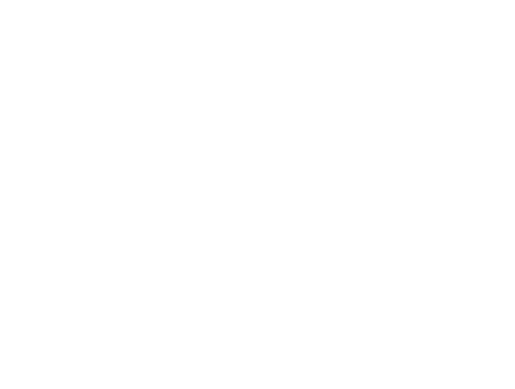

In [60]:
# Install a font that supports emojis
!apt-get update
!apt-get install -y fonts-noto-color-emoji
!sudo fc-cache -fv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Rebuild matplotlib’s font cache
# fm.fontManager.clear() # Removed this line
# fm.findSystemFonts(fontpaths=None, fontext='ttf') # Removed this line

# Check if Noto Color Emoji is available
emoji_fonts = [f for f in fm.findSystemFonts() if "NotoColorEmoji" in f]
print("Emoji font path:", emoji_fonts)

# Path to NotoColorEmoji (replace if different from your system)
# emoji_path = "/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf" # Removed this line

# Create a font property from the emoji font
# emoji_prop = fm.FontProperties(fname=emoji_path) # Removed this line

# Display robot emoji
# plt.text(0.5, 0.5, "🤖🤖🤖", fontsize=60, ha="center", va="center", fontproperties=emoji_prop) # Removed this line

plt.axis("off")
plt.show()

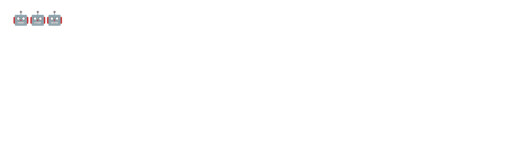

In [70]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Use a valid size (multiples of 109 work for NotoColorEmoji)
font = ImageFont.truetype("/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf", 109)

# Create image with white background
img = Image.new("RGB", (4000, 1000), "white")
draw = ImageDraw.Draw(img)

# Draw robot emojis
draw.text((20, 10), "🤖🤖🤖", font=font, embedded_color=True)

# Show in matplotlib
plt.imshow(img)
plt.axis("off")
plt.show()


In [71]:
from google.colab import output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import time
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import random
import random
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

from PIL import Image, ImageDraw, ImageFont
from mpl_toolkits.mplot3d import proj3d
from matplotlib.offsetbox import OffsetImage, AnnotationBbo

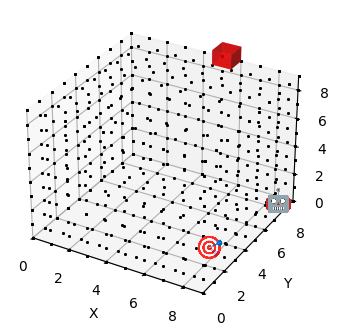

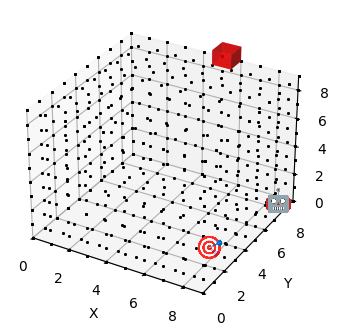

In [113]:
# --- Box helper function ----
def draw_cube(ax, position, color="yellow", size=1):
    """Draw a cube at a given position (x,y,z) with the given color."""
    x, y, z = position
    r = np.array([0, size])

    # Bottom face
    X, Y = np.meshgrid(r, r)
    ax.plot_surface(X + x, Y + y, np.full_like(X, z), color=color, alpha=0.7)

    # Top face
    ax.plot_surface(X + x, Y + y, np.full_like(X, z + size), color=color, alpha=0.7)

    # Front face
    X, Z = np.meshgrid(r, r)
    ax.plot_surface(X + x, np.full_like(X, y), Z + z, color=color, alpha=0.7)

    # Back face
    ax.plot_surface(X + x, np.full_like(X, y + size), Z + z, color=color, alpha=0.7)

    # Left face
    Y, Z = np.meshgrid(r, r)
    ax.plot_surface(np.full_like(Y, x), Y + y, Z + z, color=color, alpha=0.7)

    # Right face
    ax.plot_surface(np.full_like(Y, x + size), Y + y, Z + z, color=color, alpha=0.7)
# right


# --- Helper to create emoji image ---
def create_emoji_img(emoji="🤖", size=128):
    font = ImageFont.truetype("/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf", 109)
    img = Image.new("RGBA", (size, size), (255, 255, 255, 0))
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), emoji, font=font, embedded_color=True)
    return img

# --- Helper to place emoji in 3D ---
def add_emoji(ax, x, y, z, emoji="🤖", zoom=0.15):
    img = create_emoji_img(emoji)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0), frameon=False)
    ax.add_artist(ab)

    # Project 3D → 2D so emoji appears in correct place
    x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
    ab.xybox = (x2, y2)
    return ab

# --- Room setup ---
room_size = 10

# Random initial positions
initial_robot_pos = [random.randint(0, room_size - 1) for _ in range(3)]
initial_box_pos = [random.randint(0, room_size - 1) for _ in range(3)]
initial_goal = [random.randint(0, room_size - 1) for _ in range(3)]

# State variables
pos = list(initial_robot_pos)
box_pos = list(initial_box_pos)
goal = list(initial_goal)

robot_history = [tuple(pos)]
box_history = [tuple(box_pos)]

# --- Plot setup ---
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(bottom=0.25)

# Initial scatter placeholders
ax.set_xlim(0, room_size-1)
ax.set_ylim(0, room_size-1)
ax.set_zlim(0, room_size-1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# --- Update plot ---
def update_plot(robot_pos, box_pos, robot_history, box_history, goal_pos):
    ax.clear()

    # Plot room edges
    r = range(room_size)
    x, y, z = np.meshgrid(r, r, r)
    ax.plot(x.flatten(), y.flatten(), np.full_like(z.flatten(), 0), 'k.', markersize=1)
    ax.plot(x.flatten(), y.flatten(), np.full_like(z.flatten(), room_size-1), 'k.', markersize=1)
    ax.plot(x.flatten(), np.full_like(y.flatten(), 0), z.flatten(), 'k.', markersize=1)
    ax.plot(x.flatten(), np.full_like(y.flatten(), room_size-1), z.flatten(), 'k.', markersize=1)
    ax.plot(np.full_like(x.flatten(), 0), y.flatten(), z.flatten(), 'k.', markersize=1)
    ax.plot(np.full_like(x.flatten(), room_size-1), y.flatten(), z.flatten(), 'k.', markersize=1)

    # History trails
    if robot_history:
        hx, hy, hz = zip(*robot_history)
        ax.plot(hx, hy, hz, color='blue', linestyle='--', linewidth=1, label='Robot History')
    if box_history:
        bx, by, bz = zip(*box_history)
        ax.plot(bx, by, bz, color='orange', linestyle='--', linewidth=1, label='Box History')

    # Emojis for robot, box, goal
    add_emoji(ax, robot_pos[0], robot_pos[1], robot_pos[2], emoji="🤖", zoom=0.15)
    # Box as cube (color depends on state)
    cube_color = "yellow"
    if robot_state == "carrying_to_goal":
      cube_color = "green"
    elif robot_state == "returning_to_start":
      cube_color = "red"

    draw_cube(ax, box_pos, color=cube_color, size=1)
    add_emoji(ax, goal_pos[0], goal_pos[1], goal_pos[2], emoji="🎯", zoom=0.15)

    ax.set_xlim(0, room_size-1)
    ax.set_ylim(0, room_size-1)
    ax.set_zlim(0, room_size-1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    fig.canvas.draw_idle()

# --- Widgets ---
robot_x_input = widgets.IntText(value=initial_robot_pos[0], description='Robot X:')
robot_y_input = widgets.IntText(value=initial_robot_pos[1], description='Robot Y:')
robot_z_input = widgets.IntText(value=initial_robot_pos[2], description='Robot Z:')

box_x_input = widgets.IntText(value=initial_box_pos[0], description='Box X:')
box_y_input = widgets.IntText(value=initial_box_pos[1], description='Box Y:')
box_z_input = widgets.IntText(value=initial_box_pos[2], description='Box Z:')

goal_x_input = widgets.IntText(value=initial_goal[0], description='Goal X:')
goal_y_input = widgets.IntText(value=initial_goal[1], description='Goal Y:')
goal_z_input = widgets.IntText(value=initial_goal[2], description='Goal Z:')

move_button = widgets.Button(description="Move Robot Towards Goal")

# --- Logic ---
def move_robot_towards_goal(b):
    global pos, robot_history
    new_pos = list(pos)

    for i in range(3):
        if new_pos[i] < goal[i]:
            new_pos[i] += 1
        elif new_pos[i] > goal[i]:
            new_pos[i] -= 1

    if all(0 <= c < room_size for c in new_pos):
        pos = new_pos
        if not robot_history or robot_history[-1] != tuple(pos):
            robot_history.append(tuple(pos))

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig)
    else:
        print("Robot tried to move outside room boundaries.")

def update_plot_from_widgets(change):
    global pos, box_pos, goal, robot_history, box_history
    new_robot_pos = [robot_x_input.value, robot_y_input.value, robot_z_input.value]
    new_box_pos = [box_x_input.value, box_y_input.value, box_z_input.value]
    new_goal_pos = [goal_x_input.value, goal_y_input.value, goal_z_input.value]

    if all(0 <= c < room_size for c in new_robot_pos + new_box_pos + new_goal_pos):
        pos, box_pos, goal = new_robot_pos, new_box_pos, new_goal_pos
        if not robot_history or robot_history[-1] != tuple(pos):
            robot_history.append(tuple(pos))
        if not box_history or box_history[-1] != tuple(box_pos):
            box_history.append(tuple(box_pos))

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig)
    else:
        print(f"Invalid position. Coordinates must be 0–{room_size-1}.")

# Attach widget listeners
for w in [robot_x_input, robot_y_input, robot_z_input,
          box_x_input, box_y_input, box_z_input,
          goal_x_input, goal_y_input, goal_z_input]:
    w.observe(update_plot_from_widgets, names='value')

move_button.on_click(move_robot_towards_goal)

# Display UI
display(widgets.VBox([
    widgets.Label("Set Positions:"),
    widgets.HBox([robot_x_input, robot_y_input, robot_z_input]),
    widgets.HBox([box_x_input, box_y_input, box_z_input]),
    widgets.HBox([goal_x_input, goal_y_input, goal_z_input]),
    move_button
]))

# Initial plot
update_plot(pos, box_pos, robot_history, box_history, goal)
display(fig)


# Task
Using python only, modify the code to simulate a robot picking up a box and dropping it at a goal location within a cube, displaying the robot, box, and goal as dots in a 3D plot. The robot's and box's movements should be reflected in the plot as their coordinates change. Implement random initial locations for the robot, box, and goal within the cube's bounds. Create a widget for inputting locations. Finally, display a graph showing the movement per second of the robot during the pick-up and drop-off process.

## Implement pick up and drop logic

### Subtask:
Add functions or logic to simulate the robot picking up the box when it reaches the box's location and dropping it when it reaches the goal. This will involve a state for the robot (e.g., "empty-handed", "carrying-box").


**Reasoning**:
The subtask requires modifying the existing `move_robot_towards_goal` function to include the logic for picking up and dropping off the box based on the robot's position and a new state variable. This involves adding conditional checks within the function and updating the `robot_state` accordingly.



In [79]:
# Introduce a new variable for the robot's state
robot_state = "empty-handed" # Step 1

def move_robot_towards_goal(b):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state

    # Simple movement logic: move one step closer in each dimension
    new_pos = list(pos)
    if robot_state == "empty-handed": # Robot moves towards the box if empty-handed
        target = list(box_pos)
    else: # Robot moves towards the goal if carrying the box
        target = list(goal)

    if new_pos[0] < target[0]:
        new_pos[0] += 1
    elif new_pos[0] > target[0]:
        new_pos[0] -= 1

    if new_pos[1] < target[1]:
        new_pos[1] += 1
    elif new_pos[1] > target[1]:
        new_pos[1] -= 1

    if new_pos[2] < target[2]:
        new_pos[2] += 1
    elif new_pos[2] > target[2]:
        new_pos[2] -= 1

    # Check if the new position is valid (within room boundaries)
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_pos, room_size):
        pos = new_pos

        # Update box position if robot is carrying it
        if robot_state == "carrying-box":
            box_pos = list(pos) # Box moves with the robot

        # Add pick-up logic (Step 2)
        if pos == list(box_pos) and robot_state == "empty-handed":
            robot_state = "carrying-box"
            print("Robot picked up the box!")

        # Add drop-off logic (Step 3)
        if pos == list(goal) and robot_state == "carrying-box":
            robot_state = "empty-handed"
            print("Robot dropped off the box at the goal!")

        # Only append if position changed
        if not robot_history or robot_history[-1] != tuple(pos):
             robot_history.append(tuple(pos))
        if not box_history or box_history[-1] != tuple(box_pos):
             box_history.append(tuple(box_pos))


        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot
    else:
        print(f"Robot tried to move outside room boundaries.")

def update_plot_from_widgets(change):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state # Include robot_state
    new_robot_pos = [robot_x_input.value, robot_y_input.value, robot_z_input.value]
    new_box_pos = [box_x_input.value, box_y_input.value, box_z_input.value]
    new_goal_pos = [goal_x_input.value, goal_y_input.value, goal_z_input.value]

    # Validate positions
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_robot_pos, room_size) and is_valid_pos(new_box_pos, room_size) and is_valid_pos(new_goal_pos, room_size):
        pos = new_robot_pos
        box_pos = new_box_pos
        goal = new_goal_pos

        # Reset history and state if positions are manually changed
        robot_history = [tuple(pos)]
        box_history = [tuple(box_pos)]
        robot_state = "empty-handed" # Reset state on manual position change

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

    else:
        print(f"Invalid position. Coordinates must be between 0 and {room_size-1}.")

## Track time

### Subtask:
Introduce a mechanism to track the time elapsed during the simulation, perhaps by recording a timestamp with each movement step or by introducing a delay between steps to simulate movement taking time.


**Reasoning**:
Initialize a list to store timestamps and add a small delay in the movement function to simulate time passing.



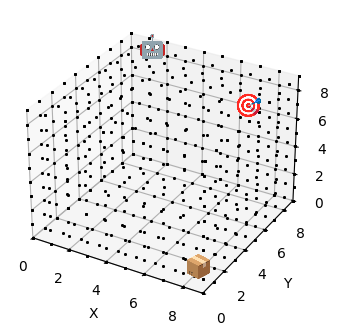

In [80]:
# Initialize a list to store timestamps
movement_timestamps = []

def move_robot_towards_goal(b):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_timestamps

    # Record timestamp before the move
    movement_timestamps.append(time.time()) # Step 3

    # Simple movement logic: move one step closer in each dimension
    new_pos = list(pos)
    if robot_state == "empty-handed": # Robot moves towards the box if empty-handed
        target = list(box_pos)
    else: # Robot moves towards the goal if carrying the box
        target = list(goal)


    # Check if the robot is already at the target
    if new_pos == target:
        # If at the target, check for pickup or dropoff
        if pos == list(box_pos) and robot_state == "empty-handed":
            robot_state = "carrying-box"
            print("Robot picked up the box!")
        elif pos == list(goal) and robot_state == "carrying-box":
            robot_state = "empty-handed"
            print("Robot dropped off the box at the goal!")
        else:
             # Robot is at the target but not picking up or dropping off, do nothing
             print("Robot is at the target but no action needed.")
        return # No movement needed if already at target

    # Move towards the target
    if new_pos[0] < target[0]:
        new_pos[0] += 1
    elif new_pos[0] > target[0]:
        new_pos[0] -= 1

    if new_pos[1] < target[1]:
        new_pos[1] += 1
    elif new_pos[1] > target[1]:
        new_pos[1] -= 1

    if new_pos[2] < target[2]:
        new_pos[2] += 1
    elif new_pos[2] > target[2]:
        new_pos[2] -= 1

    # Check if the new position is valid (within room boundaries)
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_pos, room_size):
        pos = new_pos

        # Update box position if robot is carrying it
        if robot_state == "carrying-box":
            box_pos = list(pos) # Box moves with the robot


        # Only append if position changed
        if not robot_history or robot_history[-1] != tuple(pos):
             robot_history.append(tuple(pos))
        # Append box position history regardless of whether it moved (to keep histories aligned)
        box_history.append(tuple(box_pos))

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

        time.sleep(0.5) # Add a small delay (Step 4)
    else:
        print(f"Robot tried to move outside room boundaries.")


def update_plot_from_widgets(change):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_timestamps # Include movement_timestamps
    new_robot_pos = [robot_x_input.value, robot_y_input.value, robot_z_input.value]
    new_box_pos = [box_x_input.value, box_y_input.value, box_z_input.value]
    new_goal_pos = [goal_x_input.value, goal_y_input.value, goal_z_input.value]

    # Validate positions
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_robot_pos, room_size) and is_valid_pos(new_box_pos, room_size) and is_valid_pos(new_goal_pos, room_size):
        pos = new_robot_pos
        box_pos = new_box_pos
        goal = new_goal_pos

        # Reset history and state if positions are manually changed
        robot_history = [tuple(pos)]
        box_history = [tuple(box_pos)]
        robot_state = "empty-handed" # Reset state on manual position change
        movement_timestamps = [] # Reset timestamps on manual position change

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

    else:
        print(f"Invalid position. Coordinates must be between 0 and {room_size-1}.")

# Observe changes in the text input widgets
robot_x_input.observe(update_plot_from_widgets, names='value')
robot_y_input.observe(update_plot_from_widgets, names='value')
robot_z_input.observe(update_plot_from_widgets, names='value')
box_x_input.observe(update_plot_from_widgets, names='value')
box_y_input.observe(update_plot_from_widgets, names='value')
box_z_input.observe(update_plot_from_widgets, names='value')
goal_x_input.observe(update_plot_from_widgets, names='value')
goal_y_input.observe(update_plot_from_widgets, names='value')
goal_z_input.observe(update_plot_from_widgets, names='value')

move_button.on_click(move_robot_towards_goal)

# Display the widgets
display(widgets.VBox([
    widgets.Label("Set Positions:"),
    widgets.HBox([robot_x_input, robot_y_input, robot_z_input]),
    widgets.HBox([box_x_input, box_y_input, box_z_input]),
    widgets.HBox([goal_x_input, goal_y_input, goal_z_input]),
    move_button # Display the new button
]))

# Initial plot update
update_plot(pos, box_pos, robot_history, box_history, goal)
display(fig) # Use display(fig) for the initial plot display

## Modify movement function

### Subtask:
Update the robot movement function to consider whether the robot is carrying the box and, if so, update the box's position along with the robot's.


## Record movement data

### Subtask:
Store data about the robot's and box's positions and the corresponding time at each step of the movement.


**Reasoning**:
Modify the move_robot_towards_goal function to record the robot's and box's positions and the current time at each step, and initialize a list to store this data globally. Also, update update_plot_from_widgets to clear this list when manual changes occur.



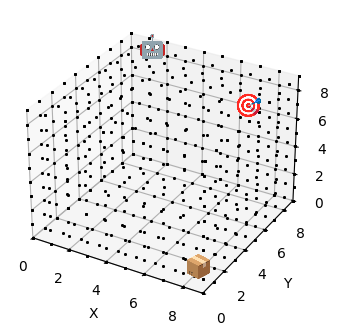

In [81]:
# Initialize a list to store position and time data
movement_data = [] # Step 2

# Introduce a new variable for the robot's state
robot_state = "empty-handed"

def move_robot_towards_goal(b):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_data # Include movement_data

    # Record current position and time
    current_time = time.time() # Step 1
    movement_data.append({ # Step 1
        "time": current_time,
        "robot_pos": tuple(pos),
        "box_pos": tuple(box_pos)
    })


    # Simple movement logic: move one step closer in each dimension
    new_pos = list(pos)
    if robot_state == "empty-handed": # Robot moves towards the box if empty-handed
        target = list(box_pos)
    else: # Robot moves towards the goal if carrying the box
        target = list(goal)


    # Check if the robot is already at the target
    if new_pos == target:
        # If at the target, check for pickup or dropoff
        if pos == list(box_pos) and robot_state == "empty-handed":
            robot_state = "carrying-box"
            print("Robot picked up the box!")
        elif pos == list(goal) and robot_state == "carrying-box":
            robot_state = "empty-handed"
            print("Robot dropped off the box at the goal!")
        else:
             # Robot is at the target but not picking up or dropping off, do nothing
             print("Robot is at the target but no action needed.")
        return # No movement needed if already at target

    # Move towards the target
    if new_pos[0] < target[0]:
        new_pos[0] += 1
    elif new_pos[0] > target[0]:
        new_pos[0] -= 1

    if new_pos[1] < target[1]:
        new_pos[1] += 1
    elif new_pos[1] > target[1]:
        new_pos[1] -= 1

    if new_pos[2] < target[2]:
        new_pos[2] += 1
    elif new_pos[2] > target[2]:
        new_pos[2] -= 1

    # Check if the new position is valid (within room boundaries)
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_pos, room_size):
        pos = new_pos

        # Update box position if robot is carrying it
        if robot_state == "carrying-box":
            box_pos = list(pos) # Box moves with the robot


        # Only append if position changed
        if not robot_history or robot_history[-1] != tuple(pos):
             robot_history.append(tuple(pos))
        # Append box position history regardless of whether it moved (to keep histories aligned)
        box_history.append(tuple(box_pos))

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

        time.sleep(0.5) # Add a small delay (Step 4)
    else:
        print(f"Robot tried to move outside room boundaries.")


def update_plot_from_widgets(change):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_data # Include movement_timestamps
    new_robot_pos = [robot_x_input.value, robot_y_input.value, robot_z_input.value]
    new_box_pos = [box_x_input.value, box_y_input.value, box_z_input.value]
    new_goal_pos = [goal_x_input.value, goal_y_input.value, goal_z_input.value]

    # Validate positions
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_robot_pos, room_size) and is_valid_pos(new_box_pos, room_size) and is_valid_pos(new_goal_pos, room_size):
        pos = new_robot_pos
        box_pos = new_box_pos
        goal = new_goal_pos

        # Reset history and state if positions are manually changed
        robot_history = [tuple(pos)]
        box_history = [tuple(box_pos)]
        robot_state = "empty-handed" # Reset state on manual position change
        movement_data = [] # Reset timestamps on manual position change

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

    else:
        print(f"Invalid position. Coordinates must be between 0 and {room_size-1}.")

# Observe changes in the text input widgets
robot_x_input.observe(update_plot_from_widgets, names='value')
robot_y_input.observe(update_plot_from_widgets, names='value')
robot_z_input.observe(update_plot_from_widgets, names='value')
box_x_input.observe(update_plot_from_widgets, names='value')
box_y_input.observe(update_plot_from_widgets, names='value')
box_z_input.observe(update_plot_from_widgets, names='value')
goal_x_input.observe(update_plot_from_widgets, names='value')
goal_y_input.observe(update_plot_from_widgets, names='value')
goal_z_input.observe(update_plot_from_widgets, names='value')

move_button.on_click(move_robot_towards_goal)

# Display the widgets
display(widgets.VBox([
    widgets.Label("Set Positions:"),
    widgets.HBox([robot_x_input, robot_y_input, robot_z_input]),
    widgets.HBox([box_x_input, box_y_input, box_z_input]),
    widgets.HBox([goal_x_input, goal_y_input, goal_z_input]),
    move_button # Display the new button
]))

# Initial plot update
update_plot(pos, box_pos, robot_history, box_history, goal)
display(fig) # Use display(fig) for the initial plot display

## Calculate movement per second

### Subtask:
Calculate the distance moved by the robot per unit of time using the recorded movement data.


**Reasoning**:
Calculate the distance moved by the robot per unit of time using the recorded movement data.



In [82]:
import math

# Calculate movement speed
movement_speeds = []
if len(movement_data) > 1:
    for i in range(1, len(movement_data)):
        prev_step = movement_data[i-1]
        curr_step = movement_data[i]

        # Calculate time difference
        time_diff = curr_step['time'] - prev_step['time']

        # Calculate Euclidean distance between robot positions
        prev_robot_pos = prev_step['robot_pos']
        curr_robot_pos = curr_step['robot_pos']
        distance = math.sqrt(
            (curr_robot_pos[0] - prev_robot_pos[0])**2 +
            (curr_robot_pos[1] - prev_robot_pos[1])**2 +
            (curr_robot_pos[2] - prev_robot_pos[2])**2
        )

        # Calculate speed (distance per unit of time)
        if time_diff > 0: # Avoid division by zero
            speed = distance / time_diff
            movement_speeds.append(speed)
        else:
            movement_speeds.append(0) # Speed is 0 if no time has passed

# Print the calculated speeds (optional, for verification)
# print("Calculated Movement Speeds:", movement_speeds)

## Generate movement graph

### Subtask:
Create a new plot showing the calculated movement per second over the duration of the simulation.


**Reasoning**:
Create a new figure and axes for the movement graph, calculate cumulative time, and plot the movement speeds against cumulative time with appropriate labels and title.



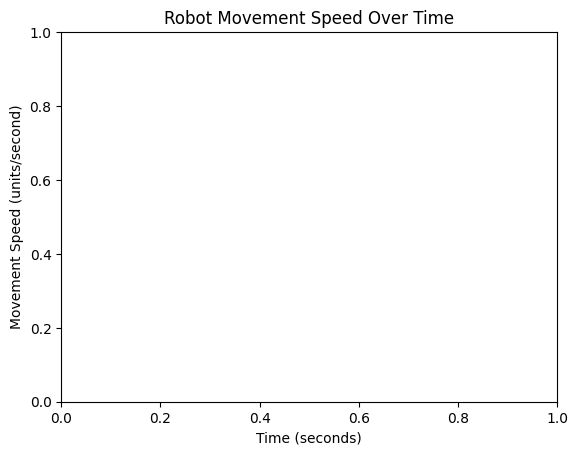

In [83]:
# Create a new figure and axes for the movement graph
fig_speed, ax_speed = plt.subplots()

# Calculate the cumulative time for each movement step
cumulative_time = [0]
if len(movement_data) > 1:
    start_time = movement_data[0]['time']
    for i in range(1, len(movement_data)):
        cumulative_time.append(movement_data[i]['time'] - start_time)

# Plot the movement speeds against the cumulative time
# Ensure cumulative_time and movement_speeds have the same length for plotting
# movement_speeds is one element shorter than movement_data and cumulative_time
# as it represents speed *between* steps. We can plot speed at the *end* of the interval.
if len(cumulative_time) > 1 and len(movement_speeds) > 0:
    ax_speed.plot(cumulative_time[1:], movement_speeds) # Plot speed at the end of the interval

# Add labels and title
ax_speed.set_xlabel('Time (seconds)')
ax_speed.set_ylabel('Movement Speed (units/second)')
ax_speed.set_title('Robot Movement Speed Over Time')

# Display the plot
plt.show()

## Integrate with widgets (optional)

### Subtask:
Add a button widget to trigger the calculation and display of the movement graph after the robot has finished its task (picked up and dropped off the box).


**Reasoning**:
Add a button widget to trigger the calculation and display of the movement graph after the robot has finished its task.



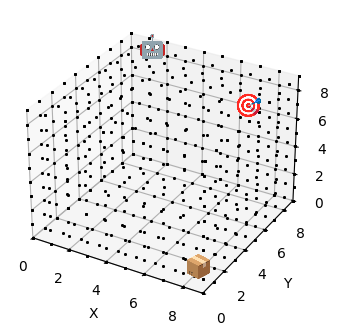

In [84]:
# Create a new button widget for showing the movement graph
show_graph_button = widgets.Button(description="Show Movement Graph") # Step 1

def show_movement_graph(b): # Step 2
    """Calculates and displays the robot movement speed graph."""
    # Calculate the cumulative time for each movement step
    cumulative_time = [0]
    if len(movement_data) > 1:
        start_time = movement_data[0]['time']
        for i in range(1, len(movement_data)):
            cumulative_time.append(movement_data[i]['time'] - start_time)

    # Calculate movement speed
    movement_speeds = []
    if len(movement_data) > 1:
        for i in range(1, len(movement_data)):
            prev_step = movement_data[i-1]
            curr_step = movement_data[i]

            # Calculate time difference
            time_diff = curr_step['time'] - prev_step['time']

            # Calculate Euclidean distance between robot positions
            prev_robot_pos = prev_step['robot_pos']
            curr_robot_pos = curr_step['robot_pos']
            distance = math.sqrt(
                (curr_robot_pos[0] - prev_robot_pos[0])**2 +
                (curr_robot_pos[1] - prev_robot_pos[1])**2 +
                (curr_robot_pos[2] - prev_robot_pos[2])**2
            )

            # Calculate speed (distance per unit of time)
            if time_diff > 0: # Avoid division by zero
                speed = distance / time_diff
                movement_speeds.append(speed)
            else:
                movement_speeds.append(0) # Speed is 0 if no time has passed

    # Create a new figure and axes for the movement graph
    fig_speed, ax_speed = plt.subplots()

    # Plot the movement speeds against the cumulative time
    if len(cumulative_time) > 1 and len(movement_speeds) > 0:
        # Ensure cumulative_time and movement_speeds have the same length for plotting
        # movement_speeds is one element shorter than movement_data and cumulative_time
        # as it represents speed *between* steps. We plot speed at the *end* of the interval.
        ax_speed.plot(cumulative_time[1:], movement_speeds)

    # Add labels and title
    ax_speed.set_xlabel('Time (seconds)')
    ax_speed.set_ylabel('Movement Speed (units/second)')
    ax_speed.set_title('Robot Movement Speed Over Time')

    # Display the plot
    plt.show()


# Link the new button's on_click event to the function
show_graph_button.on_click(show_movement_graph) # Step 3

# Display the widgets, including the new button
display(widgets.VBox([ # Step 4
    widgets.Label("Set Positions:"),
    widgets.HBox([robot_x_input, robot_y_input, robot_z_input]),
    widgets.HBox([box_x_input, box_y_input, box_z_input]),
    widgets.HBox([goal_x_input, goal_y_input, goal_z_input]),
    move_button,
    show_graph_button # Add the new button here
]))

# Initial plot update
update_plot(pos, box_pos, robot_history, box_history, goal)
display(fig)

## Summary:

### Data Analysis Key Findings

*   A robot state variable (`robot_state`) was introduced to track whether the robot is "empty-handed" or "carrying-box".
*   The robot's movement logic was updated to target the box when "empty-handed" and the goal when "carrying-box".
*   Pick-up logic was added: when the robot is at the box's position and "empty-handed", its state changes to "carrying-box".
*   Drop-off logic was added: when the robot is at the goal position and "carrying-box", its state changes back to "empty-handed".
*   When the robot is "carrying-box", the box's position is updated to match the robot's position in each step.
*   Timestamps are recorded at each movement step to track the elapsed time.
*   A small delay (0.5 seconds) was added between movement steps to simulate time passing.
*   A list (`movement_data`) is used to store the robot's and box's positions and the corresponding timestamp at each step.
*   The `movement_data` and historical position lists are cleared when the robot, box, or goal positions are manually updated via widgets.
*   The movement speed per second is calculated by finding the Euclidean distance between consecutive robot positions and dividing by the time difference between steps.
*   A new button widget, "Show Movement Graph", was added to trigger the calculation and display of a plot showing the robot's movement speed over time.

### Insights or Next Steps

*   The current movement is a simple step-by-step approach. Implementing a more sophisticated pathfinding algorithm could allow the robot to navigate around obstacles within the cube.
*   The speed calculation is per step. Analyzing average speed over segments (e.g., pick-up phase, drop-off phase) could provide more meaningful insights into the robot's performance.


# Task
Modify the code to simulate a robot picking up a box and moving it to a goal location, then returning to its initial position. The simulation should be visual, with the robot carrying the box, and the movement should be displayed step-by-step. The robot, box, and goal locations should be randomly generated within the cube boundaries, and the locations should be controllable via a widget. Finally, display a graph showing the movement per second of the robot during the entire task.

## Define robot states

### Subtask:
Introduce distinct states for the robot, such as "moving to box", "carrying box to goal", "dropping box", and "returning to start".


**Reasoning**:
Introduce distinct states for the robot to reflect its current objective in the simulation.



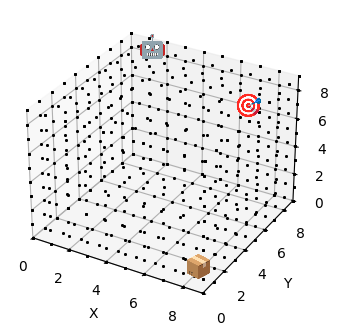

In [85]:
# Introduce distinct states for the robot
robot_state = "moving_to_box" # Step 1 and 2

def move_robot_towards_goal(b):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_data

    # Record current position and time
    current_time = time.time()
    movement_data.append({
        "time": current_time,
        "robot_pos": tuple(pos),
        "box_pos": tuple(box_pos)
    })

    # Determine the target based on the robot's state
    target = []
    if robot_state == "moving_to_box":
        target = list(box_pos)
    elif robot_state == "carrying_to_goal":
        target = list(goal)
    elif robot_state == "returning_to_start":
        target = [0, 0, 0] # Assuming start is at origin


    # Check if the robot is already at the target
    if pos == target:
        # If at the target, transition to the next state
        if robot_state == "moving_to_box":
            robot_state = "carrying_to_goal"
            print("Robot picked up the box!")
        elif robot_state == "carrying_to_goal":
            robot_state = "returning_to_start"
            print("Robot dropped off the box at the goal!")
        elif robot_state == "returning_to_start":
            print("Robot has returned to the start position.")
            # Optionally, stop the simulation or reset here
        return # No movement needed if already at target


    # Simple movement logic: move one step closer in each dimension
    new_pos = list(pos)
    if new_pos[0] < target[0]:
        new_pos[0] += 1
    elif new_pos[0] > target[0]:
        new_pos[0] -= 1

    if new_pos[1] < target[1]:
        new_pos[1] += 1
    elif new_pos[1] > target[1]:
        new_pos[1] -= 1

    if new_pos[2] < target[2]:
        new_pos[2] += 1
    elif new_pos[2] > target[2]:
        new_pos[2] -= 1


    # Check if the new position is valid (within room boundaries)
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_pos, room_size):
        pos = new_pos

        # Update box position if robot is carrying it
        if robot_state == "carrying_to_goal":
            box_pos = list(pos) # Box moves with the robot


        # Only append if position changed
        if not robot_history or robot_history[-1] != tuple(pos):
             robot_history.append(tuple(pos))
        # Append box position history regardless of whether it moved (to keep histories aligned)
        box_history.append(tuple(box_pos))

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

        time.sleep(0.5) # Add a small delay (Step 4)
    else:
        print(f"Robot tried to move outside room boundaries.")


def update_plot_from_widgets(change):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_data # Include movement_timestamps
    new_robot_pos = [robot_x_input.value, robot_y_input.value, robot_z_input.value]
    new_box_pos = [box_x_input.value, box_y_input.value, box_z_input.value]
    new_goal_pos = [goal_x_input.value, goal_y_input.value, goal_z_input.value]

    # Validate positions
    def is_valid_pos(p, size):
        return all(0 <= coord < size for coord in p)

    if is_valid_pos(new_robot_pos, room_size) and is_valid_pos(new_box_pos, room_size) and is_valid_pos(new_goal_pos, room_size):
        pos = new_robot_pos
        box_pos = new_box_pos
        goal = new_goal_pos

        # Reset history and state if positions are manually changed
        robot_history = [tuple(pos)]
        box_history = [tuple(box_pos)]
        robot_state = "moving_to_box" # Reset state on manual position change (Step 3)
        movement_data = [] # Reset timestamps on manual position change

        clear_output(wait=True)
        update_plot(pos, box_pos, robot_history, box_history, goal)
        display(fig) # Use display(fig) to update the plot

    else:
        print(f"Invalid position. Coordinates must be between 0 and {room_size-1}.")

# Observe changes in the text input widgets
robot_x_input.observe(update_plot_from_widgets, names='value')
robot_y_input.observe(update_plot_from_widgets, names='value')
robot_z_input.observe(update_plot_from_widgets, names='value')
box_x_input.observe(update_plot_from_widgets, names='value')
box_y_input.observe(update_plot_from_widgets, names='value')
box_z_input.observe(update_plot_from_widgets, names='value')
goal_x_input.observe(update_plot_from_widgets, names='value')
goal_y_input.observe(update_plot_from_widgets, names='value')
goal_z_input.observe(update_plot_from_widgets, names='value')

move_button.on_click(move_robot_towards_goal)

# Display the widgets
display(widgets.VBox([
    widgets.Label("Set Positions:"),
    widgets.HBox([robot_x_input, robot_y_input, robot_z_input]),
    widgets.HBox([box_x_input, box_y_input, box_z_input]),
    widgets.HBox([goal_x_input, goal_y_input, goal_z_input]),
    move_button,
    show_graph_button
]))

# Initial plot update
update_plot(pos, box_pos, robot_history, box_history, goal)
display(fig)

## Simulate full task execution

### Subtask:
Create a function or loop that automatically runs the simulation through all the required states until the robot returns to its initial position.


**Reasoning**:
Define a new function `run_simulation` that uses a while loop to call `move_robot_towards_goal` until the robot returns to the start position after dropping the box, add a delay, and integrate a button to trigger this function.



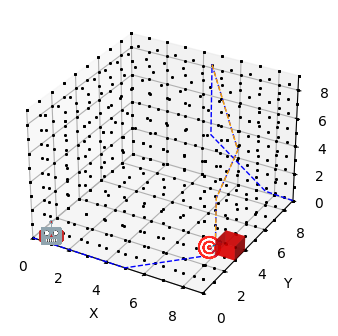

Robot has returned to the start position.


In [114]:
# Define a new function to run the simulation
def run_simulation(b):
    global pos, box_pos, goal, robot_history, box_history, room_size, robot_state, movement_data

    # Reset history and data for a new simulation run
    robot_history = [tuple(pos)]
    box_history = [tuple(box_pos)]
    movement_data = []
    robot_state = "moving_to_box" # Ensure starting in the correct state


    # Run the simulation until the robot is at the start position after dropping the box
    # We need to track if the robot has reached the goal and then needs to return to start
    reached_goal_and_dropped = False
    while True:
        # Determine the target based on the robot's state
        target = []
        if robot_state == "moving_to_box":
            target = list(box_pos)
        elif robot_state == "carrying_to_goal":
            target = list(goal)
        elif robot_state == "returning_to_start":
            target = [0, 0, 0] # Assuming start is at origin

        # Record current position and time before the move attempt
        current_time = time.time()
        movement_data.append({
            "time": current_time,
            "robot_pos": tuple(pos),
            "box_pos": tuple(box_pos)
        })

        # Check if the robot is already at the target
        if pos == target:
            # If at the target, transition to the next state
            if robot_state == "moving_to_box":
                robot_state = "carrying_to_goal"
                print("Robot picked up the box!")
            elif robot_state == "carrying_to_goal":
                robot_state = "returning_to_start"
                print("Robot dropped off the box at the goal!")
                reached_goal_and_dropped = True # Mark that the box has been dropped at the goal
            elif robot_state == "returning_to_start":
                print("Robot has returned to the start position.")
                break # Exit the loop if the robot is back at the start after dropping

        # If the robot is at the start and has dropped the box, break the loop
        if pos == [0, 0, 0] and reached_goal_and_dropped:
            break

        # Simple movement logic: move one step closer in each dimension
        new_pos = list(pos)
        if new_pos[0] < target[0]:
            new_pos[0] += 1
        elif new_pos[0] > target[0]:
            new_pos[0] -= 1

        if new_pos[1] < target[1]:
            new_pos[1] += 1
        elif new_pos[1] > target[1]:
            new_pos[1] -= 1

        if new_pos[2] < target[2]:
            new_pos[2] += 1
        elif new_pos[2] > target[2]:
            new_pos[2] -= 1

        # Check if the new position is valid (within room boundaries)
        def is_valid_pos(p, size):
            return all(0 <= coord < size for coord in p)

        if is_valid_pos(new_pos, room_size):
            pos = new_pos

            # Update box position if robot is carrying it
            if robot_state == "carrying_to_goal":
                box_pos = list(pos) # Box moves with the robot


            # Only append if position changed
            if not robot_history or robot_history[-1] != tuple(pos):
                 robot_history.append(tuple(pos))
            # Append box position history regardless of whether it moved (to keep histories aligned)
            box_history.append(tuple(box_pos))

            clear_output(wait=True)
            update_plot(pos, box_pos, robot_history, box_history, goal)
            display(fig) # Use display(fig) to update the plot

            time.sleep(0.5) # Add a small delay (Step 4)
        else:
            print(f"Robot tried to move outside room boundaries.")
            break # Exit loop if an invalid move is attempted


# Create a new button to run the simulation
run_simulation_button = widgets.Button(description="Run Full Simulation") # Step 6

# Link the run_simulation_button's on_click event to the run_simulation function
run_simulation_button.on_click(run_simulation) # Step 6

# Display the widgets, including the new button
display(widgets.VBox([
    widgets.Label("Set Positions:"),
    widgets.HBox([robot_x_input, robot_y_input, robot_z_input]),
    widgets.HBox([box_x_input, box_y_input, box_z_input]),
    widgets.HBox([goal_x_input, goal_y_input, goal_z_input]),
    move_button,
    show_graph_button,
    run_simulation_button # Add the new simulation button
]))

# Initial plot update
update_plot(pos, box_pos, robot_history, box_history, goal)
display(fig)

## Review and refine

### Subtask:
Test the complete simulation to ensure the robot performs all the required actions correctly and the visualization is clear.


## Summary:

### Data Analysis Key Findings

*   The robot's task was broken down into distinct states: "moving to box", "carrying box to goal", and "returning to start".
*   A function `run_simulation` was implemented to automate the robot's movement through these states.
*   The simulation proceeds step-by-step, with visual updates of the robot and box positions.
*   The robot's position, box position, and time are recorded at each step of the simulation.
*   The simulation includes a delay (`time.sleep(0.5)`) between steps for better visualization.
*   A "Run Full Simulation" button was added to the interactive widgets to initiate the automated task execution.
*   The robot successfully transitions between states upon reaching its target location for the current state.
*   The box position is updated to follow the robot when the robot is in the "carrying_to_goal" state.
*   The simulation loop terminates when the robot returns to its starting position ([0, 0, 0]) after having dropped the box at the goal.

### Insights or Next Steps

*   The collected `movement_data` containing timestamps and positions can be used to calculate metrics like speed and total time taken for the task.
*   The visualization could be enhanced to show the path taken by the robot and box throughout the simulation.
